In [111]:
import cv2
import os
import time
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder

In [112]:
class ddbdata_loader:
    def __init__(self, data_path, image_size, classes):
        self.data_path = data_path
        self.image_size = image_size
        self.classes = classes

    def read_image(self, image_path):
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, self.image_size)
        # try:
        # except:
        #     resized_image = image
        return resized_image



    @staticmethod
    def one_hot_encode_it(vector):
        vector = vector.reshape(-1, 1)
        encoder = OneHotEncoder()
        one_hot_encoded_vector = encoder.fit_transform(vector)
        return one_hot_encoded_vector.toarray()

    def load_data(self):
        files = os.listdir(self.data_path)
        ctr = 0
        X_train, Y_train = [], []
        err = 0
        for f in files:
            class_path = f"{self.data_path}{f}/"
            files_per_class = os.listdir(class_path)
            for img_f in files_per_class:
                image_path = f"{self.data_path}{f}/{img_f}"
                try:
                    image = self.read_image(image_path)
                    X_train.append(image)
                    cls = self.classes.index(f)
                    Y_train.append(cls)
                except:
                    err+=1
                    print("err:", err)
                ctr += 1
                if ctr % 100 == 0:
                    print(f"image read: {ctr}/{len(files_per_class)}")
        X_train = np.array(X_train)/255
        Y_train = np.array(Y_train)/255
        Y_train = self.one_hot_encode_it(Y_train)

        # add randomization to both X_train and Y_Train
        combined_data = list(zip(X_train,Y_train))
        random.shuffle(combined_data)
        X_train[:],Y_train[:]=zip(*combined_data)
        return X_train, Y_train



In [113]:
start = time.time()
data_path = "C:/Users/MSI/Downloads/PFA/Revitsone-5classes/"
print (os.listdir(data_path))
image_size = (100,100)
classes = ['other_activities', 'safe_driving', 'talking_phone', 'texting_phone', 'turning']
dl = ddbdata_loader(data_path, image_size, classes)
X_train, Y_train = dl.load_data()

['other_activities', 'safe_driving', 'talking_phone', 'texting_phone', 'turning']
image read: 100/2128
image read: 200/2128
image read: 300/2128
err: 1
err: 2
image read: 400/2128
err: 3
err: 4
image read: 500/2128
image read: 600/2128
image read: 700/2128
image read: 800/2128
image read: 900/2128
image read: 1000/2128
err: 5
image read: 1100/2128
err: 6
image read: 1200/2128
image read: 1300/2128
image read: 1400/2128
image read: 1500/2128
image read: 1600/2128
err: 7
image read: 1700/2128
image read: 1800/2128
image read: 1900/2128
err: 8
err: 9
image read: 2000/2128
image read: 2100/2128
image read: 2200/2203
image read: 2300/2203
image read: 2400/2203
image read: 2500/2203
image read: 2600/2203
image read: 2700/2203
image read: 2800/2203
image read: 2900/2203
image read: 3000/2203
image read: 3100/2203
image read: 3200/2203
image read: 3300/2203
image read: 3400/2203
image read: 3500/2203
image read: 3600/2203
image read: 3700/2203
image read: 3800/2203
image read: 3900/2203
image 

In [114]:
print(len(X_train))
print(len(Y_train))

10751
10751


In [117]:
from sklearn.model_selection import train_test_split
# Divisez les données en ensembles d'entraînement, de test et de validation
X_train, X_remaining, Y_train, Y_remaining = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_remaining, Y_remaining, test_size=0.2,random_state=42)

In [130]:
print("Nombre d'instances dans l'ensemble de données :",len(X_train))
print("Nombre d'instances dans X_remaining :",len(X_remaining))
print("Nombre d'instances dans X_test :",len(X_test))
print("Nombre d'instances dans X_valid :",len(X_valid))

Nombre d'instances dans l'ensemble de données : 8063
Nombre d'instances dans X_remaining : 2688
Nombre d'instances dans X_test : 2150
Nombre d'instances dans X_valid : 538


In [119]:
from tensorflow.keras import layers, models, Input, Model

def VGGNet():
    inp = layers.Input((100, 100, 3))
    x = layers.Conv2D(4, 3, 1, activation='relu')(inp)
    x = layers.Conv2D(4, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(8, 3, 1, activation='relu')(x)
    x = layers.Conv2D(8, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(16, 3, 1, activation='relu')(x)
    x = layers.Conv2D(16, 3, 1, activation='relu')(x)
    x = layers.Conv2D(16, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(32, 3, 1, activation='relu')(x)
    x = layers.Conv2D(32, 3, 1, activation='relu')(x)
    x = layers.Conv2D(32, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG


In [94]:
model_VGG = VGGNet()
model_VGG.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_40 (Conv2D)          (None, 98, 98, 4)         112       
                                                                 
 conv2d_41 (Conv2D)          (None, 96, 96, 4)         148       
                                                                 
 batch_normalization_12 (Bat  (None, 96, 96, 4)        16        
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 48, 48, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 46, 46, 8)         296 

In [95]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model_VGG.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Entraînement du modèle
history = model_VGG.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))

# Évaluation du modèle
test_loss, test_acc = model_VGG.evaluate(X_test, Y_test)
print("Test accuracy:", test_acc)
print("Loss sur les données de test:", test_loss)


Epoch 1/10
252/252 [==============================] - 23s 87ms/step - loss: 0.3413 - accuracy: 0.5870 - val_loss: 0.5064 - val_accuracy: 0.4424
Epoch 2/10
252/252 [==============================] - 21s 85ms/step - loss: 0.1411 - accuracy: 0.8699 - val_loss: 0.2075 - val_accuracy: 0.7974
Epoch 3/10
252/252 [==============================] - 22s 86ms/step - loss: 0.0752 - accuracy: 0.9323 - val_loss: 0.0761 - val_accuracy: 0.9275
Epoch 4/10
252/252 [==============================] - 22s 88ms/step - loss: 0.0588 - accuracy: 0.9490 - val_loss: 0.0575 - val_accuracy: 0.9424
Epoch 5/10
252/252 [==============================] - 23s 91ms/step - loss: 0.0420 - accuracy: 0.9614 - val_loss: 0.0329 - val_accuracy: 0.9703
Epoch 6/10
252/252 [==============================] - 22s 86ms/step - loss: 0.0312 - accuracy: 0.9763 - val_loss: 0.0293 - val_accuracy: 0.9721
Epoch 7/10
252/252 [==============================] - 22s 86ms/step - loss: 0.0315 - accuracy: 0.9722 - val_loss: 0.0623 - val_accuracy:

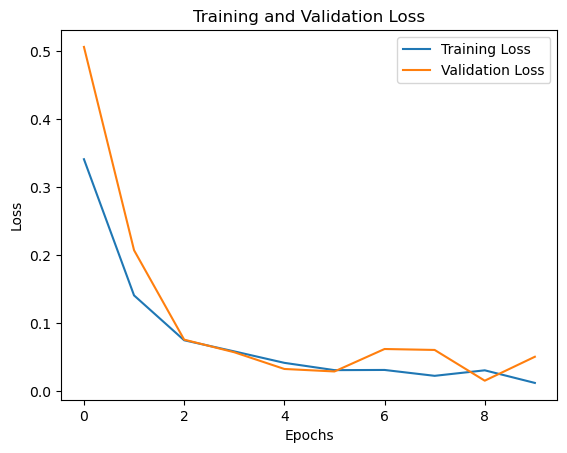

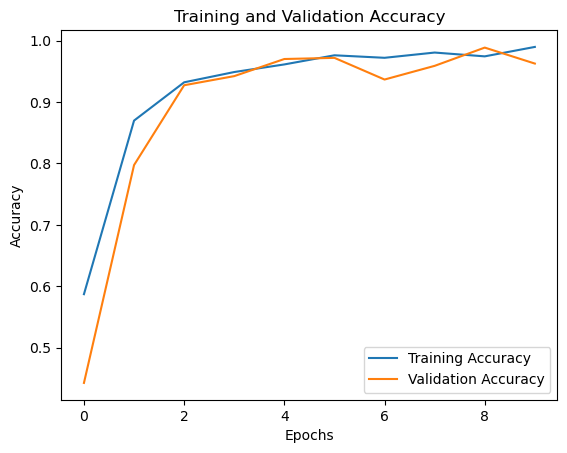

In [96]:
import matplotlib.pyplot as plt

# Extraire l'historique de l'entraînement
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Tracer les courbes de perte
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer les courbes d'exactitude
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [97]:
from sklearn.metrics import classification_report, confusion_matrix

# Prédiction sur l'ensemble de test
Y_pred = model_VGG.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convertir les étiquettes de test en classes
Y_true_classes = np.argmax(Y_test, axis=1)

# Rapport de classification
print("Rapport de classification :")
print(classification_report(Y_true_classes, Y_pred_classes, target_names=classes))

# Matrice de confusion
print("Matrice de confusion :")
conf_matrix = confusion_matrix(Y_true_classes, Y_pred_classes)
print(conf_matrix)


68/68 [==============================] - 2s 22ms/step
Rapport de classification :
                  precision    recall  f1-score   support

other_activities       0.97      0.61      0.75        97
    safe_driving       0.95      0.97      0.96       288
   talking_phone       0.96      1.00      0.98       472
   texting_phone       0.98      0.98      0.98       640
         turning       0.98      0.99      0.99       653

        accuracy                           0.97      2150
       macro avg       0.97      0.91      0.93      2150
    weighted avg       0.97      0.97      0.97      2150

Matrice de confusion :
[[ 59   7  17   4  10]
 [  2 278   0   6   2]
 [  0   1 470   1   0]
 [  0   6   4 628   2]
 [  0   2   1   2 648]]


In [98]:
import os
import cv2
import numpy as np
import random
from sklearn.metrics import accuracy_score

# Define the folder path containing the new images
folder_path = "C:/Users/MSI/Desktop/images_teste/"

# List to store the full paths of all images in the folder
installed_images_paths = []

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        # Construct the full path and add it to the list
        image_path = os.path.join(folder_path, filename)
        installed_images_paths.append(image_path)

# Shuffle the list of image paths randomly
random.shuffle(installed_images_paths)

# Load and preprocess the images
installed_images = []
image_size = (100, 100)

for image_path in installed_images_paths:
    image = cv2.imread(image_path)
    if image is not None:  # Check if the image was loaded successfully
        resized_image = cv2.resize(image, image_size)
        normalized_image = resized_image / 255.0  # Normalization
        installed_images.append(normalized_image)
    else:
        print(f"Skipping {image_path} due to read error")

if len(installed_images) == 0:
    print("No valid images found in the specified folder.")
else:
    # Convert to numpy array
    installed_images = np.array(installed_images)

    # Make predictions on the installed images
    predictions = model_VGG.predict(installed_images)  # Utilisez votre modèle ici
    # Get the predicted classes for each image
    predicted_classes = np.argmax(predictions, axis=1)
    # List to store predicted labels for each image
    predicted_labels = [classes[pred_class] for pred_class in predicted_classes]

    # Display images with their predictions
    print("\nImages with their predictions:")
    for idx, image_path in enumerate(installed_images_paths):
        prediction = predicted_labels[idx]
        print(f"Image {idx + 1}: {image_path}, Prediction: {prediction}")

    # Extract file names from true labels (full file paths)
    true_file_names = [os.path.basename(image_path).split('.')[0] for image_path in installed_images_paths]
    # Create a list of tuples containing the true file names and their corresponding predicted labels
    true_predicted_pairs = list(zip(true_file_names, predicted_labels))

    # Calculate accuracy
    true_labels = [filename.split('_')[0] for filename in true_file_names]
    predicted_labels = [label.split('_')[0] for label in predicted_labels]
    accuracy = accuracy_score(true_labels, predicted_labels)
    print("Accuracy:", accuracy)


1/1 [==============================] - 0s 31ms/step

Images with their predictions:
Image 1: C:/Users/MSI/Desktop/images_teste/texting_1.jpg, Prediction: texting_phone
Image 2: C:/Users/MSI/Desktop/images_teste/talking_3.jpg, Prediction: talking_phone
Image 3: C:/Users/MSI/Desktop/images_teste/safe_5.jpg, Prediction: turning
Image 4: C:/Users/MSI/Desktop/images_teste/safe_3.jpg, Prediction: texting_phone
Image 5: C:/Users/MSI/Desktop/images_teste/other_5.jpg, Prediction: turning
Image 6: C:/Users/MSI/Desktop/images_teste/safe_2.jpg, Prediction: texting_phone
Image 7: C:/Users/MSI/Desktop/images_teste/turning_5.jpg, Prediction: talking_phone
Image 8: C:/Users/MSI/Desktop/images_teste/talking_4.jpg, Prediction: talking_phone
Image 9: C:/Users/MSI/Desktop/images_teste/turning_1.jpg, Prediction: texting_phone
Image 10: C:/Users/MSI/Desktop/images_teste/other_4.jpg, Prediction: turning
Image 11: C:/Users/MSI/Desktop/images_teste/other_1.jpg, Prediction: turning
Image 12: C:/Users/MSI/Deskto

In [101]:
import os
import cv2
import numpy as np
import random
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

# Define the folder path containing the new images
folder_path = "C:/Users/MSI/Desktop/TEST/"

# Create an instance of ddbdata_loader
dl = ddbdata_loader(data_path=folder_path, image_size=(100, 100), classes=['other_activities', 'safe_driving', 'talking_phone', 'texting_phone', 'turning'])

# Load and preprocess the images using the data loader
installed_images, installed_labels = dl.load_data()

if installed_images is not None:
    # Make predictions on the installed images
    predictions = model_VGG.predict(installed_images)  # Utilisez votre modèle ici
    predicted_classes = np.argmax(predictions, axis=1)
    predicted_labels = [dl.classes[pred_class] for pred_class in predicted_classes]

    # Convertir les étiquettes prédites en one-hot
    predicted_labels_one_hot = to_categorical(predicted_classes, num_classes=len(dl.classes))

    # Calculer l'exactitude
    accuracy = accuracy_score(installed_labels, predicted_labels_one_hot)
    print("Accuracy:", accuracy)


1/1 [==============================] - 0s 34ms/step
Accuracy: 0.32


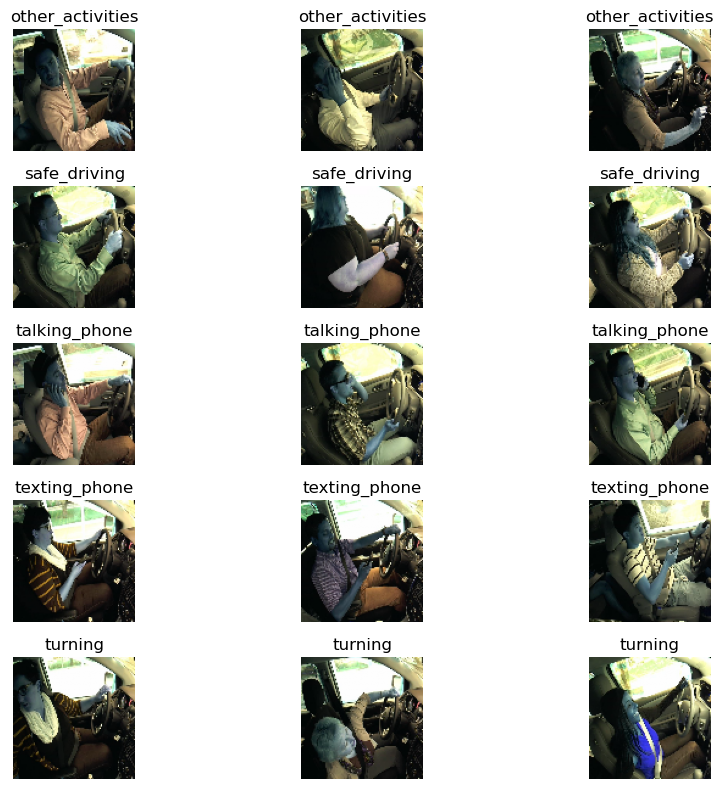

In [103]:
# Afficher quelques exemples d'images pour chaque classe
plt.figure(figsize=(10, 8))
for i, cls in enumerate(classes):
    class_indices = np.where(Y_true_classes == classes.index(cls))[0]
    random_indices = np.random.choice(class_indices, size=3, replace=False)
    for j, idx in enumerate(random_indices):
        plt.subplot(5, 3, i*3 + j + 1)
        plt.imshow(X_test[idx])
        plt.title(cls)
        plt.axis('off')
plt.tight_layout()
plt.show()

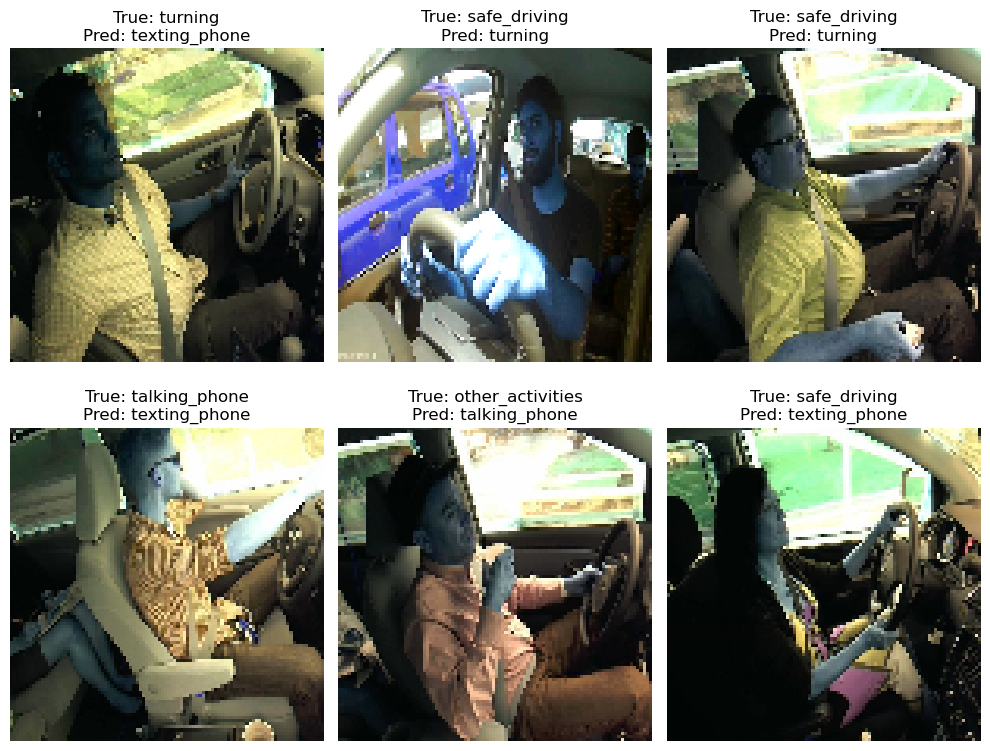

In [105]:
# Afficher des exemples d'images pour lesquelles le modèle s'est trompé
incorrect_indices = np.where(Y_pred_classes != Y_true_classes)[0]
plt.figure(figsize=(10, 8))
for i, idx in enumerate(incorrect_indices[:6]):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {classes[Y_true_classes[idx]]}\nPred: {classes[Y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

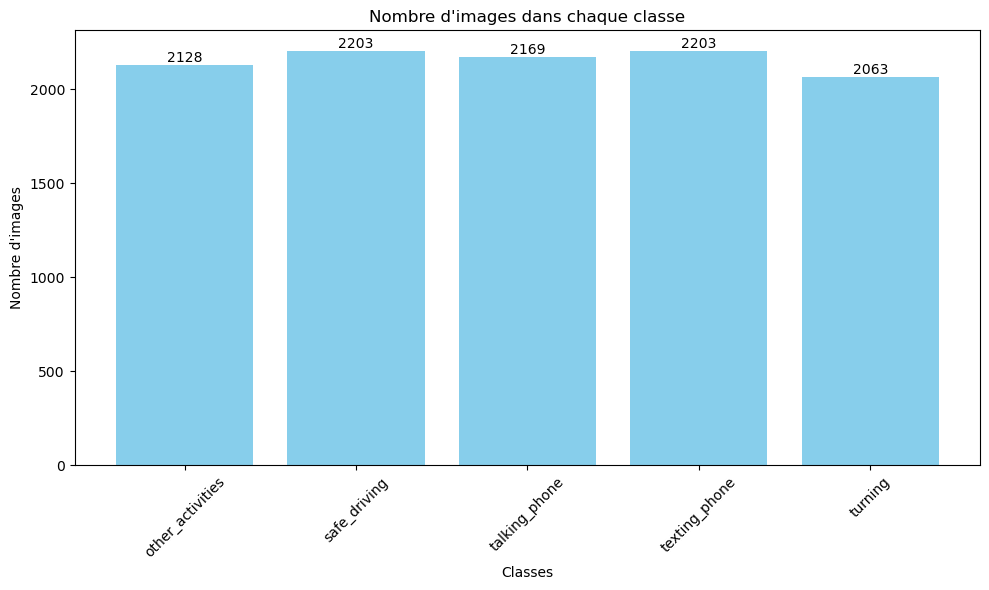

In [120]:
# Compter le nombre d'images dans chaque classe
class_image_counts = {}
for cls in classes:
    class_path = os.path.join(data_path, cls)
    if os.path.isdir(class_path):
        class_images = os.listdir(class_path)
        class_image_counts[cls] = len(class_images)
    else:
        print(f"Le répertoire {class_path} n'existe pas.")

# Créer un diagramme à barres pour visualiser le nombre d'images dans chaque classe
plt.figure(figsize=(10, 6))
bars = plt.bar(class_image_counts.keys(), class_image_counts.values(), color='skyblue')
plt.title('Nombre d\'images dans chaque classe')
plt.xlabel('Classes')
plt.ylabel('Nombre d\'images')
plt.xticks(rotation=45)
plt.tight_layout()

# Ajouter les valeurs au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Afficher le diagramme à barres
plt.show()
